# <font color = "green">Project Titanic - Classification</font>

#### Overview

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Variable Notes
#### pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
#### age: 
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
#### sibsp: 
The dataset defines family relations in this way...
#### Sibling :
brother, sister, stepbrother, stepsister
#### Spouse :
husband, wife (mistresses and fiancés were ignored)
#### parch: 
The dataset defines family relations in this way...
#### Parent :
mother, father
#### Child :
daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Importing libraries

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc = {"figure.figsize":(10,6)})

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [196]:
data = pd.read_csv("Titanic_dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###  Features

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [198]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [199]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical value analysis

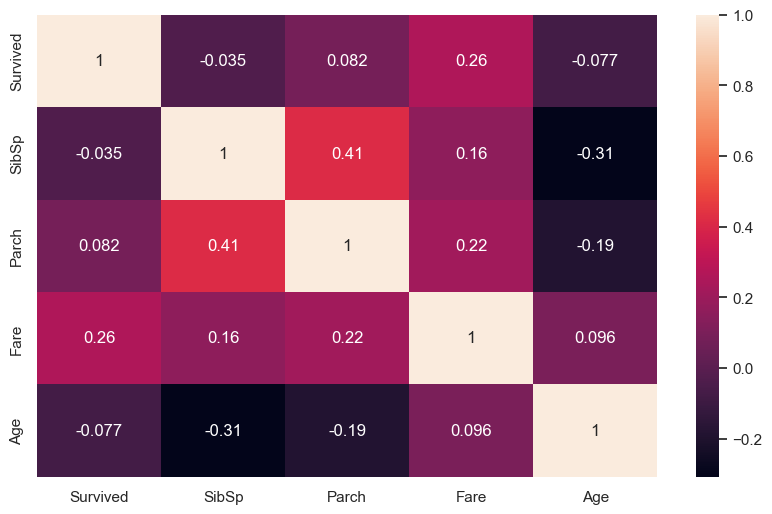

In [200]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(data[["Survived", "SibSp", "Parch", "Fare", "Age"]].corr(), annot = True)

## SibSp - Number of Siblings / Spouses aboard titanic

In [201]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [202]:
data['SibSp'].nunique()

7

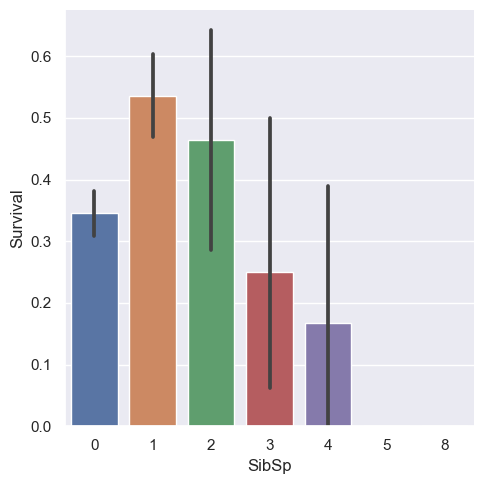

In [203]:
sns.catplot(x = "SibSp", y = "Survived", data = data, kind = "bar").set_ylabels("Survival")

## Age

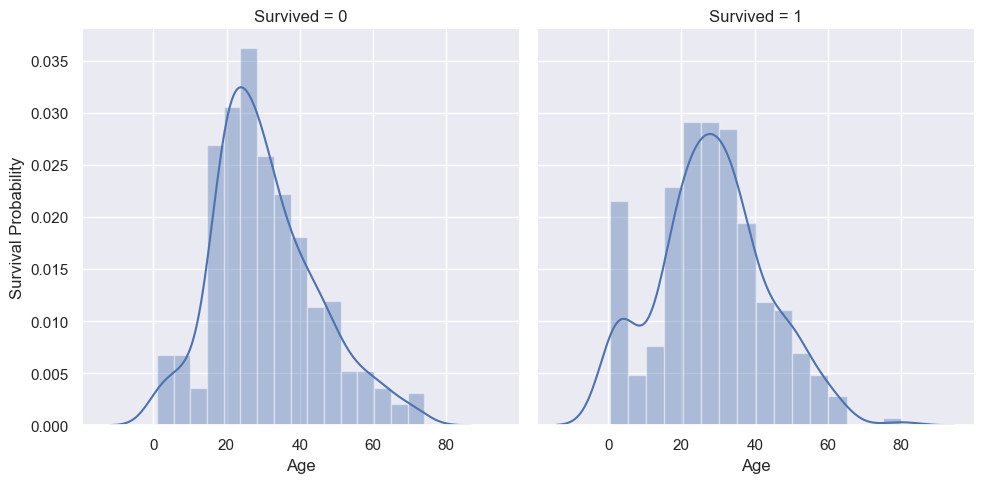

In [204]:
age_visualization = sns.FacetGrid(data, col = "Survived", height = 5)
age_visualization = age_visualization.map(sns.distplot,"Age").set_ylabels("Survival Probability")

## Sex

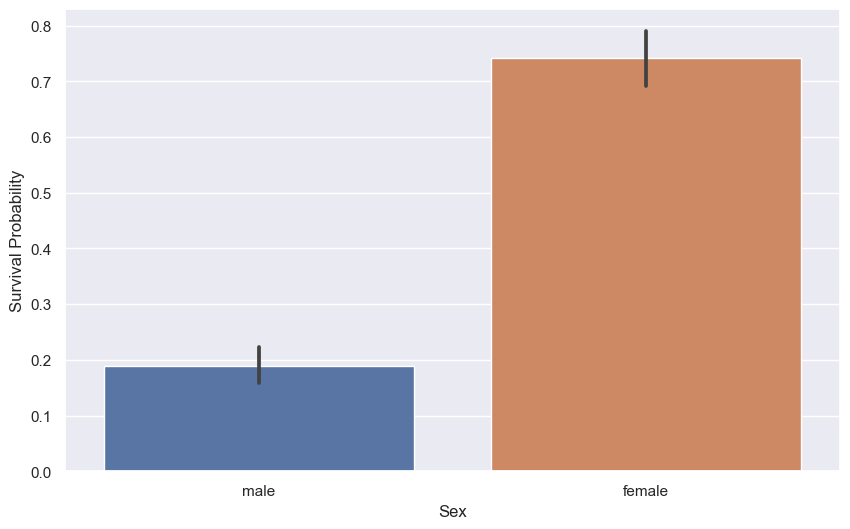

In [205]:
sex_plot = sns.barplot(x = "Sex", y = "Survived", data = data).set_ylabel("Survival Probability")

In [206]:
data[['Sex', 'Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


## P-Class

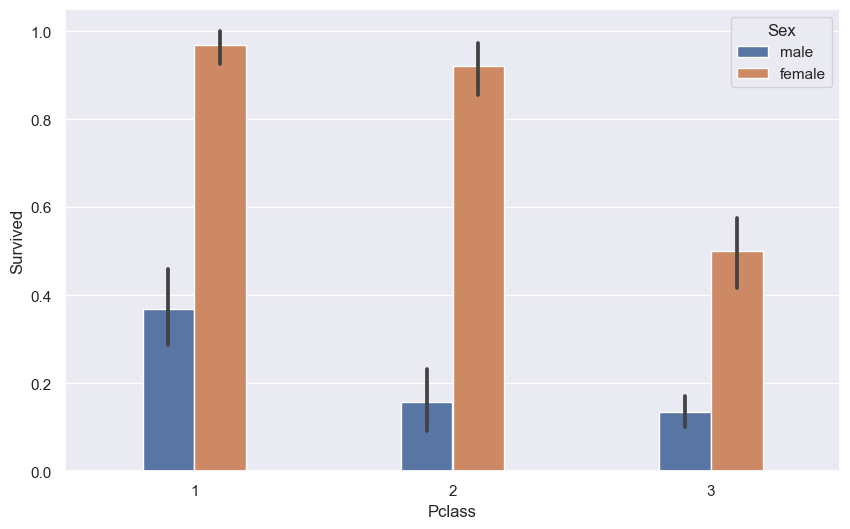

In [207]:
pclass = sns.barplot(x = "Pclass", y = "Survived", data = data, width = 0.4, hue = "Sex")

## Embarked

In [208]:
data["Embarked"].isnull().sum()

2

In [209]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [210]:
data["Embarked"] = data["Embarked"].fillna("S")

In [211]:
data["Embarked"].isnull().sum()

0

Text(0, 0.5, 'Survival Probability')

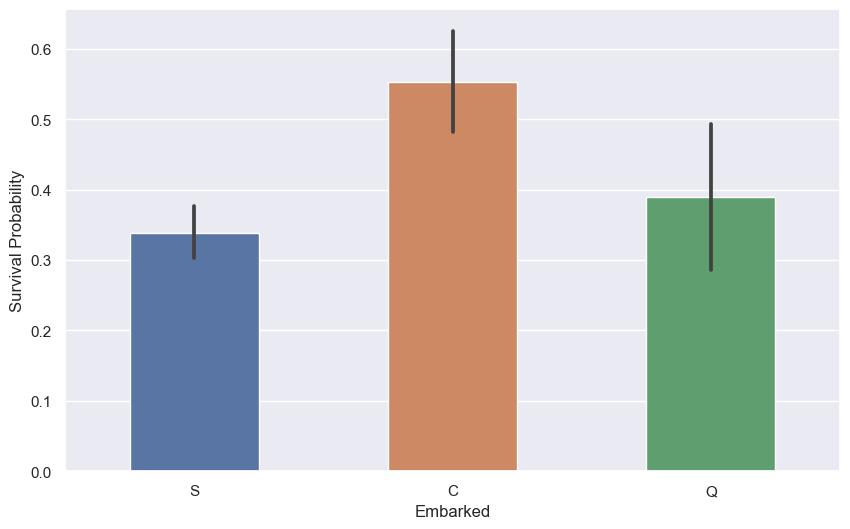

In [212]:
sns.barplot(x = "Embarked", y = "Survived", data = data, width=0.5).set_ylabel("Survival Probability")

## Preparing Data

In [213]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handeling null values

In [214]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [215]:
mean = data["Age"].mean()
std = data["Age"].std()

is_null = data["Age"].isnull().sum()

In [216]:
print(f"Mean: {mean}, STD: {std}, is_null count: {is_null}")


Mean: 29.69911764705882, STD: 14.526497332334044, is_null count: 177


In [217]:
rand_age = np.random.randint(mean-std, mean+std, size = is_null)

In [218]:
type(rand_age)

numpy.ndarray

In [219]:
df = data['Age'].copy()
df[np.isnan(df)] = rand_age
data["Age"] = df

In [220]:
data["Age"].isnull().sum()

0

No null value remaining.

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
col_to_drop = ["PassengerId", "Cabin", "Ticket", "Name"]
data.drop(col_to_drop, axis = 1, inplace = True)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [224]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [225]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [226]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [227]:
ports = {"S": 0, "C": 1,"Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

In [228]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Now we have all numerical values 

## Splitting the data

In [229]:
x = data.drop(data.columns[[0]], axis =1)
y = data["Survived"]

In [230]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 0)

## Scaling

In [231]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Classification

In [232]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier( )
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [233]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain) 

RandomForestClassifier(n_estimators=1000)

In [234]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [235]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest,svc_classifier_ypred)
dt_classifier_acc= accuracy_score(ytest,dt_classifier_ypred)
knn_classifier_acc= accuracy_score(ytest,knn_classifier_ypred)
rf_classifier_acc= accuracy_score(ytest,rf_classifier_ypred)

In [236]:
print( "Logistic Regression:",round(logreg_acc*100,2))
print( " Support Vector:",round(svc_classifier_acc*100,2))
print( " Decision Tree:",round(dt_classifier_acc*100,2))
print( "K-NN Classifier:",round(knn_classifier_acc*100,2))
print( " Random Forest:",round(rf_classifier_acc*100,2))

Logistic Regression: 81.72
 Support Vector: 81.72
 Decision Tree: 77.24
K-NN Classifier: 80.97
 Random Forest: 82.46
